## Importando bibliotecas necessárias

In [79]:
# modelagem
import pandas as pd
import numpy as np

#graficos
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as fo

# avisos
import warnings
warnings.filterwarnings('ignore')

# configurações
pd.set_option('display.max_rows', 200)
pd.set_option('display.max_columns', 100)

plt.rcParams['figure.figsize'] = (12,6)
plt.style.use('seaborn-darkgrid')

# Libs
import re #REGEX
import nltk #NPL


## Importando e instalando bibliotecas

## Importando base de dados

In [80]:
# importando base de dados
base_dados = pd.read_csv('Tweets_Mg.csv')

# Dimensão 
base_dados.shape

(8199, 26)

In [81]:
# verificando dados
base_dados.head()

,Unnamed: 0,Created At,Text,Geo Coordinates.latitude,Geo Coordinates.longitude,User Location,Username,User Screen Name,Retweet Count,Classificacao,Observação,Unnamed: 10,Unnamed: 11,Unnamed: 12,Unnamed: 13,Unnamed: 14,Unnamed: 15,Unnamed: 16,Unnamed: 17,Unnamed: 18,Unnamed: 19,Unnamed: 20,Unnamed: 21,Unnamed: 22,Unnamed: 23,Unnamed: 24
0,0,Sun Jan 08 01:22:05 +0000 2017,���⛪ @ Catedral de Santo Antônio - Governador ...,NaN,NaN,Brasil,Leonardo C Schneider,LeoCSchneider,0,Neutro,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1,Sun Jan 08 01:49:01 +0000 2017,"� @ Governador Valadares, Minas Gerais https:/...",-41.9333,-18.85,NaN,Wândell,klefnews,0,Neutro,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2,Sun Jan 08 01:01:46 +0000 2017,"�� @ Governador Valadares, Minas Gerais https:...",-41.9333,-18.85,NaN,Wândell,klefnews,0,Neutro,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,3,Wed Jan 04 21:43:51 +0000 2017,��� https://t.co/BnDsO34qK0,NaN,NaN,NaN,Ana estudando,estudandoconcur,0,Neutro,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,4,Mon Jan 09 15:08:21 +0000 2017,��� PSOL vai questionar aumento de vereadores ...,NaN,NaN,NaN,Emily,Milly777,0,Negativo,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


## Modelagem e EDA(Exploração)

### Ajustando Campo Nulo

<Axes: title={'left': 'Analisando campos nulos'}>

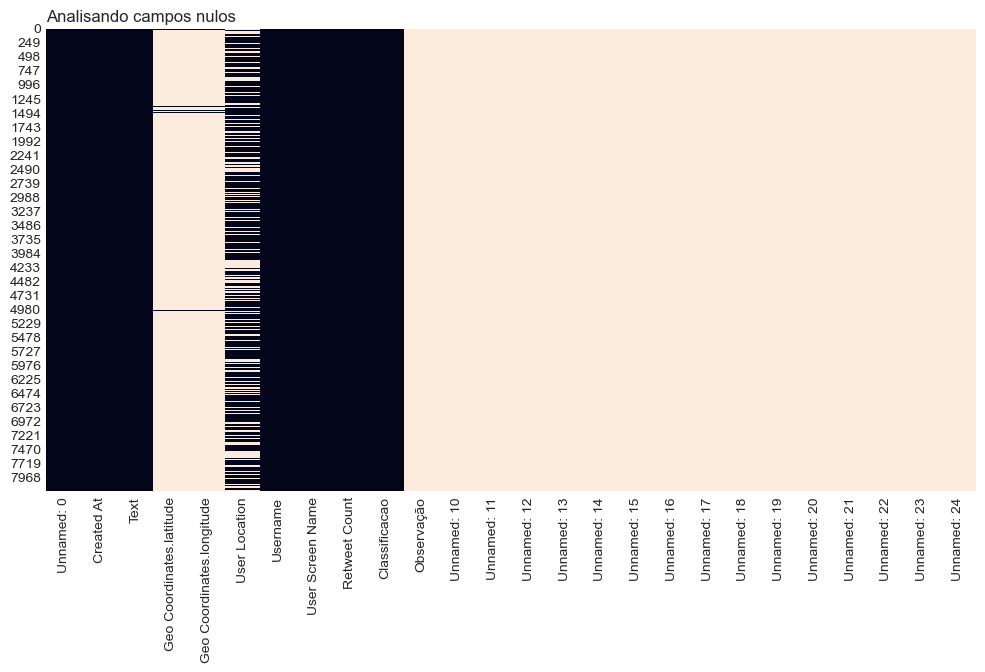

In [82]:
#avaliar campos nulos
nulos = base_dados.isnull()

plt.title('Analisando campos nulos', loc = 'left')
sns.heatmap(nulos, cbar = False)

In [83]:
# Colunas
base_dados.columns


Index(['Unnamed: 0', 'Created At', 'Text', 'Geo Coordinates.latitude',
       'Geo Coordinates.longitude', 'User Location', 'Username',
       'User Screen Name', 'Retweet Count', 'Classificacao', 'Observação',
       'Unnamed: 10', 'Unnamed: 11', 'Unnamed: 12', 'Unnamed: 13',
       'Unnamed: 14', 'Unnamed: 15', 'Unnamed: 16', 'Unnamed: 17',
       'Unnamed: 18', 'Unnamed: 19', 'Unnamed: 20', 'Unnamed: 21',
       'Unnamed: 22', 'Unnamed: 23', 'Unnamed: 24'],
      dtype='object')

In [84]:
# Remover as colunas totalmente nulas
base_dados.drop(columns = base_dados.columns[10:], inplace = True)

In [85]:
# Dimensão
base_dados.shape

(8199, 10)

In [86]:
# Unicos
base_dados.nunique()

Unnamed: 0                   8199
Created At                   7945
Text                         5765
Geo Coordinates.latitude       57
Geo Coordinates.longitude      57
User Location                1591
Username                     3907
User Screen Name             3966
Retweet Count                 113
Classificacao                   3
dtype: int64

In [87]:
# Retirar
base_dados.drop(columns = 'Unnamed: 0', inplace = True)

# Dimensão
base_dados.shape

(8199, 9)

In [88]:
#Verificando
base_dados.head()

,Created At,Text,Geo Coordinates.latitude,Geo Coordinates.longitude,User Location,Username,User Screen Name,Retweet Count,Classificacao
0,Sun Jan 08 01:22:05 +0000 2017,���⛪ @ Catedral de Santo Antônio - Governador ...,NaN,NaN,Brasil,Leonardo C Schneider,LeoCSchneider,0,Neutro
1,Sun Jan 08 01:49:01 +0000 2017,"� @ Governador Valadares, Minas Gerais https:/...",-41.9333,-18.85,NaN,Wândell,klefnews,0,Neutro
2,Sun Jan 08 01:01:46 +0000 2017,"�� @ Governador Valadares, Minas Gerais https:...",-41.9333,-18.85,NaN,Wândell,klefnews,0,Neutro
3,Wed Jan 04 21:43:51 +0000 2017,��� https://t.co/BnDsO34qK0,NaN,NaN,NaN,Ana estudando,estudandoconcur,0,Neutro
4,Mon Jan 09 15:08:21 +0000 2017,��� PSOL vai questionar aumento de vereadores ...,NaN,NaN,NaN,Emily,Milly777,0,Negativo


In [89]:
base_dados.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8199 entries, 0 to 8198
Data columns (total 9 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Created At                 8199 non-null   object 
 1   Text                       8199 non-null   object 
 2   Geo Coordinates.latitude   104 non-null    float64
 3   Geo Coordinates.longitude  104 non-null    float64
 4   User Location              5489 non-null   object 
 5   Username                   8199 non-null   object 
 6   User Screen Name           8199 non-null   object 
 7   Retweet Count              8199 non-null   int64  
 8   Classificacao              8199 non-null   object 
dtypes: float64(2), int64(1), object(6)
memory usage: 576.6+ KB


### Ajustando data

In [90]:
# Função ajuste de datas

def AjustarData(data):
    
    #atribuir
    texto_data = data
    
    #Tranformação
    transformacao = parse(texto_data)
    
    #Extração
    data_formatada = transformacao.date()
    return data_formatada

# Atribuicao
base_dados['data_formatada'] = base_dados['Created At'].apply(AjustarData)



In [91]:
# tranformar data
base_dados['data_formatada'] = pd.to_datetime(base_dados['data_formatada'])

In [92]:
base_dados['Ano'] = base_dados['data_formatada'].dt.year
base_dados['Mes'] = base_dados['data_formatada'].dt.month
base_dados['Dia'] = base_dados['data_formatada'].dt.day



In [93]:
base_dados.head(10)


,Created At,Text,Geo Coordinates.latitude,Geo Coordinates.longitude,User Location,Username,User Screen Name,Retweet Count,Classificacao,data_formatada,Ano,Mes,Dia
0,Sun Jan 08 01:22:05 +0000 2017,���⛪ @ Catedral de Santo Antônio - Governador ...,NaN,NaN,Brasil,Leonardo C Schneider,LeoCSchneider,0,Neutro,2017-01-08,2017,1,8
1,Sun Jan 08 01:49:01 +0000 2017,"� @ Governador Valadares, Minas Gerais https:/...",-41.9333,-18.85,NaN,Wândell,klefnews,0,Neutro,2017-01-08,2017,1,8
2,Sun Jan 08 01:01:46 +0000 2017,"�� @ Governador Valadares, Minas Gerais https:...",-41.9333,-18.85,NaN,Wândell,klefnews,0,Neutro,2017-01-08,2017,1,8
3,Wed Jan 04 21:43:51 +0000 2017,��� https://t.co/BnDsO34qK0,NaN,NaN,NaN,Ana estudando,estudandoconcur,0,Neutro,2017-01-04,2017,1,4
4,Mon Jan 09 15:08:21 +0000 2017,��� PSOL vai questionar aumento de vereadores ...,NaN,NaN,NaN,Emily,Milly777,0,Negativo,2017-01-09,2017,1,9
5,Sat Jan 07 13:47:55 +0000 2017,""" bom é bandido morto""\nDeputado Cabo Júlio é ...",NaN,NaN,Um Outro Mundo É Possível,Maristela Guimarães,florpimenta,0,Neutro,2017-01-07,2017,1,7
6,Wed Jan 04 23:00:53 +0000 2017,"""..E 25% dos mineiros dizem não torcer para ti...",NaN,NaN,NaN,Adriano,almanakfc,0,Neutro,2017-01-04,2017,1,4
7,Sun Jan 08 18:34:22 +0000 2017,"""A gigantesca barba do mal"" em destaque no cad...",NaN,NaN,"Belo Horizonte, Brasil",Editora Nemo,editoranemo,2,Neutro,2017-01-08,2017,1,8
8,Wed Jan 04 22:55:08 +0000 2017,"""BB e governo de Minas travam disputa sobre de...",NaN,NaN,NaN,Minas Previ,MinasPrevi,0,Negativo,2017-01-04,2017,1,4
9,Sat Jan 07 01:37:10 +0000 2017,"""com vcs bh fica pequena!"" Belo Horizonte (pro...",NaN,NaN,Belo Horizonte - MG,Marina.,mmarinaey,0,Neutro,2017-01-07,2017,1,7


In [94]:
# Analisando
base_dados.groupby(by =['Ano','Mes']).agg(
Quantidade = ('Username','count')
)

Quantidade
Ano  Mes            
2016 12            3
2017 1          7073
     2          1123

### Ajustando a Geo-localização

In [96]:
# filtrando os nulos
analise_geo = base_dados.loc[
    (base_dados['Geo Coordinates.latitude'].notnull()) &
    (base_dados['Geo Coordinates.longitude'].notnull()) 
]

# shape
analise_geo.shape

(104, 13)

In [99]:
# Agrupar por Geo
analise_localizacao = analise_geo.groupby(by = ['Geo Coordinates.latitude','Geo Coordinates.longitude']).count()[['Username']].reset_index()

analise_localizacao.columns = ['Lat', 'Lon', 'Quantidade']

In [100]:
analise_localizacao.head()

,Lat,Lon,Quantidade
0,-46.643035,-22.270759,2
1,-46.627106,-23.493237,2
2,-46.616726,-21.131515,1
3,-45.523750,-22.330291,1
4,-45.236850,-19.331757,1


In [105]:
# Plot dos Dados
px.density_mapbox(
    analise_localizacao,
    
    #Latitude
    lat = 'Lat',
    
    #Longitude
    lon = 'Lon',
    
    #Quantidade
    z = 'Quantidade',
    
    # Estilo
    mapbox_style = 'stamen-terrain',
    
    # Centralização
    center = dict(lat = -23.700, lon = 46.555),
    
    #Zoom do mapa
    zoom = 3,
    
    #Circulo
    radius = 30
    
)